<a href="https://colab.research.google.com/github/dfukagaw28/ColabNotebooks/blob/main/IIIF%E3%83%9E%E3%83%8B%E3%83%95%E3%82%A7%E3%82%B9%E3%83%88%E3%81%8B%E3%82%89NDL%E5%8F%A4%E5%85%B8%E7%B1%8DOCR%E3%81%A7%E7%BF%BB%E5%88%BB%E3%81%97%E3%81%A6%E7%B5%90%E6%9E%9C%E3%82%92Mirador%E3%81%A7%E8%A1%A8%E7%A4%BA%E3%81%99%E3%82%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IIIFマニフェストからNDL古典籍OCRで翻刻して結果をMiradorで表示する

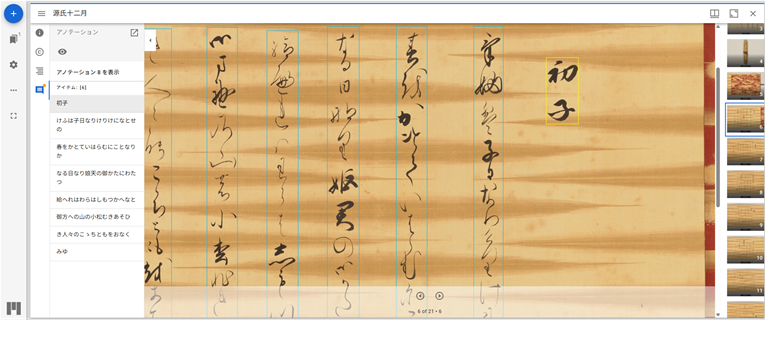

*   オリジナル版は以下の通り:
    *   [IIIFマニフェストファイルからTEI/XMLファイルを作成するプログラム.ipynb](https://github.com/nakamura196/000_tools/blob/main/IIIF%E3%83%9E%E3%83%8B%E3%83%95%E3%82%A7%E3%82%B9%E3%83%88%E3%83%95%E3%82%A1%E3%82%A4%E3%83%AB%E3%81%8B%E3%82%89TEI_XML%E3%83%95%E3%82%A1%E3%82%A4%E3%83%AB%E3%82%92%E4%BD%9C%E6%88%90%E3%81%99%E3%82%8B%E3%83%97%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%A0.ipynb) GitHub: nakamura196/000_tools
*   関連記事:
    *   [IIIFマニフェストファイルからOCR結果を含むTEI_XMLファイルを作成するプログラム](https://zenn.dev/nakamura196/articles/71049d856e6e4b) [2025/01/30]
    *   [Google Colabを用いたNDL古典籍OCRチュートリアルの不具合の修正および機能追加を行いました。](https://zenn.dev/nakamura196/articles/85178021b313f6) [2023/04/12]

*   2025-05-24 時点では，オリジナル版を Colab で実行するとエラーが発生する
    *   原因は，Python パッケージのバージョンの不整合

```
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.17.1 requires protobuf<6.0.0,>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.3 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-nvrtc-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-nvrtc-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-runtime-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-runtime-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cudnn-cu12==9.1.0.70; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cudnn-cu12 9.3.0.75 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cufft-cu12==11.2.1.3; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cufft-cu12 11.2.3.61 which is incompatible.
torch 2.6.0+cu124 requires nvidia-curand-cu12==10.3.5.147; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-curand-cu12 10.3.6.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cusolver-cu12==11.6.1.9; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cusolver-cu12 11.6.3.83 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cusparse-cu12==12.3.1.170; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cusparse-cu12 12.5.1.3 which is incompatible.
torch 2.6.0+cu124 requires nvidia-nvjitlink-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-nvjitlink-cu12 12.5.82 which is incompatible.
dataproc-spark-connect 0.7.3 requires tqdm>=4.67, but you have tqdm 4.66.4 which is incompatible.
google-cloud-bigquery 3.32.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 3.20.3 which is incompatible.
datasets 2.14.4 requires dill<0.3.8,>=0.3.0, but you have dill 0.3.8 which is incompatible.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 3.20.3 which is incompatible.
db-dtypes 1.4.3 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
```

*   ToDo:
    *   TEI/XMLファイルの生成
    *   IIIF Presentation API 3.0 への対応

以下では，ステップバイステップで動作を確かめながら動かしてみる

## 準備

In [1]:
%%writefile requirements.txt
coloredlogs==15.0.1
flet==0.28.3
humanfriendly==10.0
onnxruntime==1.22.0
ordered-set==4.1.0
repath==0.9.0
reportlab==4.4.1

Writing requirements.txt


In [2]:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 463.0/463.0 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.7 MB/s eta 0:00:00


## Step 1. IIIF マニフェストを読み込んで画像をダウンロードする

*   オリジナル版は画像サイズを指定してダウンロードしている
*   最大サイズの画像ファイルを取得したいので，方法を変える
*   保存先を Google Drive に変更する（永続化）

In [3]:
#@title 準備

# Google Drive をマウントする（要認証）
from google.colab import drive
drive.mount('/content/drive')

# 出力先ディレクトリへのシンボリックリンクをトップに作っておく
%cd /content
!ln -s /content/drive/MyDrive/koten

print("******** 準備完了！ ********")

Mounted at /content/drive
/content
******** 準備完了！ ********


In [4]:
from pathlib import Path
import httpx

def save_image(url:str, image_path:str|Path, force=False):
    image_path = Path(image_path)
    if force or not image_path.exists():
        # 画像をダウンロードして保存
        with httpx.Client() as client:
            response = client.get(url, follow_redirects=True)
            response.raise_for_status()  # エラーチェック

        # バイナリモードでファイルに書き込み
        with open(image_path, "wb") as f:
            f.write(response.content)

In [5]:
#@title 実行

import json
from pathlib import Path
import re

import httpx
from tqdm import tqdm

# 変数を設定する
manifest_url = "https://dgcl.doshisha.ac.jp/images/manifest/50000/MD00001562.json"  # @param {"type":"string"}
project_name = "doshisha-MD00001562"  # @param {"type":"string"}
assert re.fullmatch(r'^[a-zA-Z0-9_-]+$', project_name), 'project_name に使える文字は英数字と _ - だけです'
output_dir = f"/content/koten/{project_name}"
img_dir = Path(output_dir) / "img"
img_dir.mkdir(parents=True, exist_ok=True)
ocr_dir = Path(output_dir) / "ocr"
ocr_dir.mkdir(parents=True, exist_ok=True)
MAXNUM_IMAGES = 30  # @param {"type":"integer"}
force_download = False  # @param {"type":"boolean"}

# IIIF Manifest ファイルをダウンロードして読み込む
manifest = httpx.get(manifest_url).json()

canvases = manifest["sequences"][0]["canvases"]

print("label:", manifest["label"])
print("attribution:", manifest["attribution"])
print("画像枚数:", len(canvases))

assert len(canvases) < MAXNUM_IMAGES

if force_download or len([*img_dir.glob("*.jpg")]) == 0:
    # IIIF Manifest に含まれる画像ファイルをダウンロードする
    for index, canvas in tqdm(enumerate(canvases)):
        # Validate the canvas
        assert canvas["@id"]
        assert len(canvas["images"]) == 1
        image = canvas["images"][0]
        image_url = image['resource']['@id']

        filename = f'{index:04}.jpg'
        img_path = img_dir / filename

        save_image(image_url, img_path, force=force_download)

label: 源氏十二月
attribution: 同志社大学<br />Doshisha University
画像枚数: 21


21it [00:43,  2.06s/it]


## Step 2. NDL 古典籍 OCR を実行する

*   OCR結果に文字が1つもないときエラーが発生するため，ソースコードの一部を書き換えて対処する

In [6]:
#@title 準備

%cd /content
!git clone https://github.com/ndl-lab/ndlkotenocr-lite
!sed -i 's!if tatelinecnt/alllinecnt>0.5:!if alllinecnt > 0 and tatelinecnt/alllinecnt>0.5:!' ndlkotenocr-lite/src/ocr.py

/content
Cloning into 'ndlkotenocr-lite'...
remote: Enumerating objects: 287, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 287 (delta 8), reused 4 (delta 4), pack-reused 270 (from 2)
Receiving objects: 100% (287/287), 112.33 MiB | 26.81 MiB/s, done.
Resolving deltas: 100% (118/118), done.


In [7]:
#@title 実行

force_ocr = True  # @param {"type":"boolean"}

if force_ocr or not ocr_dir.exists():
    if ocr_dir.exists():
        !rm -rf {ocr_dir}
    ocr_dir.mkdir(parents=True)

    %cd /content/ndlkotenocr-lite/src
    %run ocr.py --sourcedir {img_dir} --output {ocr_dir}

/content/ndlkotenocr-lite/src
['/content/koten/doshisha-MD00001562/img/0000.jpg', '/content/koten/doshisha-MD00001562/img/0001.jpg', '/content/koten/doshisha-MD00001562/img/0002.jpg', '/content/koten/doshisha-MD00001562/img/0003.jpg', '/content/koten/doshisha-MD00001562/img/0004.jpg', '/content/koten/doshisha-MD00001562/img/0005.jpg', '/content/koten/doshisha-MD00001562/img/0006.jpg', '/content/koten/doshisha-MD00001562/img/0007.jpg', '/content/koten/doshisha-MD00001562/img/0008.jpg', '/content/koten/doshisha-MD00001562/img/0009.jpg', '/content/koten/doshisha-MD00001562/img/0010.jpg', '/content/koten/doshisha-MD00001562/img/0011.jpg', '/content/koten/doshisha-MD00001562/img/0012.jpg', '/content/koten/doshisha-MD00001562/img/0013.jpg', '/content/koten/doshisha-MD00001562/img/0014.jpg', '/content/koten/doshisha-MD00001562/img/0015.jpg', '/content/koten/doshisha-MD00001562/img/0016.jpg', '/content/koten/doshisha-MD00001562/img/0017.jpg', '/content/koten/doshisha-MD00001562/img/0018.jpg', 

## Step 3. OCR の結果を可視化する

In [8]:
#@title 準備

PORT = 8000

%cd /content

!nohup python3 -m http.server $PORT > server.log 2>&1 &

!wget https://mirador.cultural.jp/index.html

from pathlib import Path
from google.colab import output

/content
--2025-05-27 05:28:48--  https://mirador.cultural.jp/index.html
Resolving mirador.cultural.jp (mirador.cultural.jp)... 13.226.52.79, 13.226.52.95, 13.226.52.42, ...
Connecting to mirador.cultural.jp (mirador.cultural.jp)|13.226.52.79|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2208 (2.2K) [text/html]
Saving to: ‘index.html’

index.html          100%[===================>]   2.16K  --.-KB/s    in 0s      

2025-05-27 05:28:48 (653 MB/s) - ‘index.html’ saved [2208/2208]



In [9]:
import uuid


def get_id_or_dummy_url(obj):
    try:
        return obj["@id"]
    except:
        return "https://example.com/dummy"


def make_annotation(box, text, id=None, canvas=None, manifest=None):
    if id is None:
        id = f"https://example.com/dummy/{uuid.uuid4()}"

    canvas_id = get_id_or_dummy_url(canvas)
    manifest_id = get_id_or_dummy_url(manifest)

    xywh = ','.join([str(box[key]) for key in 'xywh'])

    return {
        "@context": "http://iiif.io/api/presentation/2/context.json",
        "@id": id,
        "@type": "oa:Annotation",
        "motivation": ["oa:commenting"],
        "on": {
            "@type": "oa:SpecificResource",
            "full": canvas_id,
            "selector": {
                "@type": "oa:FragmentSelector",
                "value": f"xywh={xywh}"
            },
            "within": {
                "@id": manifest_id,
                "@type": "sc:Manifest"
            },
        },
        "resource": [{
            "@type": "dctypes:Text",
            "chars": text,
            "format": "text/plain"
        }],
    }

In [10]:
# Mirador 用に annotation JSON ファイルを生成する

from tqdm import tqdm

anno_dir = Path(output_dir) / 'anno'
anno_dir.mkdir(parents=True, exist_ok=True)

assert ocr_dir.exists()

assert manifest["@id"]
manifest["@id"] = f"/koten/{project_name}/manifest.json"  # 本来は URI だが iframe で表示するためパスを指定

canvases = manifest["sequences"][0]["canvases"]

for index, canvas in tqdm(enumerate(canvases)):
    # Validate the canvas
    assert canvas["@id"]
    assert "images" in canvas
    assert len(canvas["images"]) == 1

    filename = f'{index:04}.json'
    anno_path = anno_dir / filename
    ocr_path = ocr_dir / filename
    assert ocr_path.exists()
    ocr_json = json.load(open(ocr_path))
    assert len(ocr_json["contents"]) == 1
    boxes = ocr_json["contents"][0]

    if len(boxes) > 0:
        resources = []
        for box in boxes:
            text = box["text"]
            box = {
                "x": box["boundingBox"][0][0],
                "y": box["boundingBox"][0][1],
                "w": box["boundingBox"][2][0] - box["boundingBox"][0][0],
                "h": box["boundingBox"][1][1] - box["boundingBox"][0][1],
            }
            annotation = make_annotation(box, text, canvas=canvas, manifest=manifest)
            resources.append(annotation)

        # 注釈リストの ID
        anno_list_id = f"/koten/{project_name}/anno/{filename}",  # 本来は URI だが iframe で表示するためパスを指定

        # 注釈データをファイルに保存する
        with open(anno_path, "w") as file:
            anno_list = {
                "@context": "http://www.shared-canvas.org/ns/context.json",
                "@id": anno_list_id,
                "@type": "sc:AnnotationList",
                "resources": resources,
            }
            json.dump(anno_list, fp=file, indent=2, ensure_ascii=False)

        # Canvas に注釈を追加する
        if "otherContent" not in canvas:
            canvas["otherContent"] = []
        canvas["otherContent"].append({
            "@id": anno_list_id,
            "@type": "sc:AnnotationList",
        })

# Manifest ファイルを書き出す
with open(Path(output_dir) / 'manifest.json', 'w') as file:
    json.dump(manifest, fp=file, indent=2, ensure_ascii=False)

21it [00:00, 90.49it/s]


In [11]:
#@title 実行

# パラメータを設定する
height = 800  # @param {"type":"integer"}

# HTTP サーバから見た Manifest ファイルへのパス
assert output_dir.startswith('/content')
manifest_path = Path(output_dir.replace('/content', '')) / 'manifest.json'

# HTTP サーバにアクセスして結果を IFRAME で表示する
output.serve_kernel_port_as_iframe(PORT, path=f'/?manifest={manifest_path}&annotationState=1', height=height)


<IPython.core.display.Javascript object>

*   本当は `google.colab.output.serve_kernel_port_as_window()` を使いたいが，ブラウザのセキュリティ更新により，使えなく（deprecated）なっている
    *   [Google Colabの「serve_kernel_port_as_window」が壊れた](https://qiita.com/ktanemo/items/56e9f8a93d5cc5ed3453)